# Lab 2 - kNN and Bias-Variance Tradeoff

- Your name: Lê Khánh linh

- Your student code: 20110377

# I. Hướng dẫn

## 1. Minh họa bias-variance tradeoff với k-NN cho hồi quy

### 1.1. Tìm hiểu tổng quan về dữ liệu

Phần này sẽ dùng tập dữ liệu `boston` trong thư viện `sklearn.datasets` để minh họa.

#### 1.1.1. Load dữ liệu

In [104]:
from sklearn import datasets

boston = datasets.load_boston()

c:\Users\20110\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

#### 1.1.2. Khám phá tổng quan về dữ liệu

In [105]:
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [106]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [107]:
X = boston.data
y = boston.target

print('Number of instances:', len(y))

Number of instances: 506


### 1.2. Chia dữ liệu

Ta sẽ chia dữ liệu làm 2 tập train và test với tỷ lệ 70/30.

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 506
Labels counts in y_train: 354
Labels counts in y_test: 152


### 1.3. Fit mô hình và trực quan hóa kết quả

Phần này ta sẽ đánh giá và vẽ biểu đồ kết quả của mô hình k-NN trên tập test với $k \in \{ 1, 5, 10, 15, 20, 25, 30 \}$ dùng độ đo `mean squared error (MSE)`.

Text(0, 0.5, 'MSE')

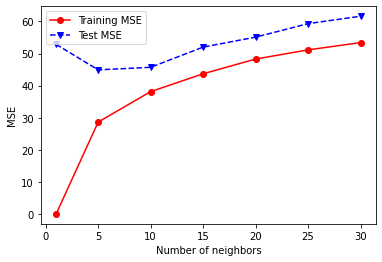

In [109]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainMSE = []
testMSE = []

for k in numNeighbors:
    reg = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    reg.fit(X_train, y_train)
    y_predTrain = reg.predict(X_train)
    y_predTest = reg.predict(X_test)
    trainMSE.append(mean_squared_error(y_train, y_predTrain))
    testMSE.append(mean_squared_error(y_test, y_predTest))

plt.plot(numNeighbors, trainMSE, 'ro-', numNeighbors, testMSE,'bv--')
plt.legend(['Training MSE','Test MSE'])
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')

# II. Bài tập

**Nhận xét**

- Khi $k = 1$ mô hình cho kết quả (MSE) trên tập train rất tốt nhưng kết quả trên tập test khá cao. Mô hình có dấu hiệu overfitting.

- Khi tăng $k$ lên ($k \in \{5, 10 \}$) kết quả trên tập train tăng lên nhưng kết quả trên tập test lại giảm xuống (so với $k = 1$). Do đó, miền giá trị $k \in [5, 10]$ có khả năng là miền giá trị mà mô hình cho kết quả tốt (good fit). 

- Khi tăng $k$ lên nữa ($k \in \{15, 20, 25, 30\}$) kết quả trên tập train tăng lên và kết quả trên tập test có khuynh hướng tăng lên. Do đó, miền giá trị $k \in [15, 30]$ nhiều khả năng là miền giá trị mà mô hình bị underfitting.

## Bài tập 1. Áp dụng thuật toán k-NN

Cho dữ liệu huấn luyện (training data) như bảng bên dưới:

| $x_1$ | $x_2$ | $y$ |
|-------|-------|-----|
|   1   |  0.5  |  1  |
|   2   |   1   |  1  |
|  2.5  |   2   |  1  |
|   3   |   2   |  1  |
|  1.5  |   2   | -1  |
|  2.5  |   3   | -1  |
|   1   |   2   | -1  |
|   1   |   1   | -1  |

Ta muốn sử dụng tập dữ liệu huấn luyện ở trên để đưa ra dự đoán, $\hat{y}$, cho điểm dữ liệu kiểm tra không được gắn nhãn $x = (2.5, 1)$ sử dụng thuật toán k-NN.

1. Tính khoảng cách Eucledian giữa mỗi quan sát và điểm kiểm tra, $x = (2.5, 1)$ (tạo thêm cột $d$  mô tả khoảng cách giữa các điểm dữ liệu trong tập huấn luyện với điểm kiểm tra, $x = (2.5, 1)$, và điền giá trị vào cột này). Xuất kết quả ra như bảng bên dưới (giá trị cột $d$ là khoảng cách tính được).

Tham khảo thêm về thư viện `numpy` ở: https://cs231n.github.io/python-numpy-tutorial/

**Trả lời**

1.a. Định nghĩa hàm tính khoảng cách Eucledian theo công thức sau:

$$d(u, v) = \sqrt{\sum_{i = 1}^{n} (u_i - v_i)^2}$$

In [110]:
import numpy as np

In [111]:
def EuclideanDistance(u, v):
    '''
        Calculate the Eucledian distance of vector u and v
    '''
    ## BEGIN YOUR CODE
    temp=np.array(u)-np.array(v)
    sum_sp=np.dot(temp.T,temp)
    return np.sqrt(sum_sp)
    ## END YOUR CODE

u = (0,0)
v = (1,0)
print("EuclideanDistance(u, v) = ", EuclideanDistance(u, v))

EuclideanDistance(u, v) =  1.0


1.b. Tính khoảng cách Eucledian giữa mỗi quan sát và điểm kiểm tra, 𝑥=(2.5,1)

In [112]:
import numpy as np

x = np.array([2.5, 1])

X = np.array([[1, 0.5],
              [2, 1],
              [2.5, 2],
              [3, 2],
              [1.5, 2],
              [2.5, 3],
              [1, 2],
              [1, 1]])
y = np.array(['1','1','1','1','-1','-1','-1','-1'])


In [113]:
x.shape

(2,)

In [114]:
X.shape

(8, 2)

In [115]:
def distanceToWholeDataset(dataPoint,X):
    n=X.shape[1]
    distance_list=[]
    for i in X:
        i=i.reshape(n,)
        distance_list.append(EuclideanDistance(dataPoint,i))
    return distance_list


distanceToWholeDataset(x,X)

[1.5811388300841898,
 0.5,
 1.0,
 1.118033988749895,
 1.4142135623730951,
 2.0,
 1.8027756377319946,
 1.5]

In [116]:
def get_classification(classes):
    from collections import Counter
    count = Counter(classes)
    return count.most_common()[0][0]
def KNN_classification_predictor(new_point,X,y,k):
    distance_list=distanceToWholeDataset(new_point,X)
    index=np.argsort(distance_list)[:k]
    result=get_classification(y[index])
    return result
    

In [117]:
KNN_classification_predictor(x,X,y,3)

'1'

| $x_1$ | $x_2$ | $y$ | $d$ |
|-------|-------|-----|-----|
|   1   |  0.5  |  1  |     |
|   2   |   1   |  1  |     |
|  2.5  |   2   |  1  |     |
|   3   |   2   |  1  |     |
|  1.5  |   2   | -1  |     |
|  2.5  |   3   | -1  |     |
|   1   |   2   | -1  |     |
|   1   |   1   | -1  |     |

2. Cho biết dự đoán của thuật toán $k$-NN cho $x = (2.5, 1)$ khi $k = 1$? Tại sao?

**Trả lời**

Với $x=(2.5,1)$ khi $k=1$ Kết quả phân loại `1` . Vì Khoảng cách từ này đến điểm $x=(2,1)$ là gần nhất có label là `1`

In [118]:
print("The predict of x=(2.5,1) is",KNN_classification_predictor(x,X,y,1))

The predict of x=(2.5,1) is 1


3. Cho biết dự đoán của thuật toán $k$-NN cho $x = (2.5, 1)$ khi $k = 3$? Tại sao?

**Trả lời**

Với $x=(2.5,1)$ khi $k=3$ Kết quả phân loại `1` . Vì Khoảng cách từ này đến các điểm $x=(2,1)$, $x=(2.5,2)$, $x=(3,2)$  là gần nhất có label là `1`

In [119]:
print("The predict of x=(2.5,1) is",KNN_classification_predictor(x,X,y,1))


The predict of x=(2.5,1) is 1


## Bài tập 2: Hiện thực thuật toán k-NN

Ở bài tập này, bạn sẽ tự hiện thực thuật toán 1-NN (k = 1). Sau đó, bạn sẽ thử nghiệm thuật toán với tập dữ liệu `iris` từ thư viện `sklearn.datasets`. Phần bên dưới là các đoạn mã làm mẫu có một số chỗ còn chừa trống để bạn viết thêm vào.

### 2.1. Load và khám phá tổng quan về dữ liệu

In [120]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
print(iris.DESCR)
X = iris.data
y = iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 2.2. Xáo trộn ngẫu nhiên và chia dữ liệu

In [121]:
# Shuffle the data
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, y = X[shuffle], y[shuffle]

# Split data into train and test set
train_data, train_labels = X[:100], y[:100]
test_data, test_labels = X[100:], y[100:]

### 2.3. Định nghĩa lớp NearestNeighborClassifier

Để đơn giản, bạn chỉ cần cài đặt thuật toán k-NN cho bài toán phân loại với k = 1. 

In [122]:
class NearestNeighborClassifier:
    # Constructor
    def __init__(self, metric = EuclideanDistance):
        self.metric = metric
    
    # No training for Nearest Neighbors, just store the data
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels
    
    # Make predictions for each test instance and return results
    def predict(self, test_data):
        results = []
        for instance in test_data:
            results.append(self._predict_instance(instance))
        return results
    
    # Private function for making a single prediction
    def _predict_instance(self, instance):
        def EuclideanDistance(u, v):
            ## BEGIN YOUR CODE
            temp=np.array(u)-np.array(v)
            sum_sp=np.dot(temp.T,temp)
            return np.sqrt(sum_sp)
        ## BEGIN YOUR CODE
        def distanceToWholeDataset(dataPoint,X):
            distance_list=[]
            for i in X:
                distance_list.append(EuclideanDistance(dataPoint,i))
            return distance_list
        def get_classification(classes):
            from collections import Counter
            count = Counter(classes)
            return count.most_common()[0][0]
        def KNN_classification_predictor(new_point,X,y,k=1):
            distance_list=distanceToWholeDataset(new_point,X)
            index=np.argsort(distance_list)[:k]
            result=get_classification(y[index])
            return result
        return KNN_classification_predictor(instance,train_data,train_labels,1)
        ## END YOUR CODE

### 2.4. Thử nghiệm NearestNeighborClassifier

In [123]:
nn = NearestNeighborClassifier()
nn.fit(train_data, train_labels)
preds = nn.predict(test_data)

total = len(preds)
correct = 0
for pred, label in zip(preds, test_labels):
    if pred == label: correct += 1

print("total: %d, correct: %d, accuracy: %3.2f" %(total, correct, 1.0*correct/total))

total: 50, correct: 48, accuracy: 0.96


## Bài tập 3. Minh họa bias-variance tradeoff với k-NN cho phân loại

### 3.1. Chia dữ liệu
Ta sẽ tiếp tục dùng tập dữ liệu `iris` từ thư viện `sklearn.datasets` cho các yêu cầu bên dưới.

Chia dữ liệu thành 2 tập train và test với tỷ lệ 80/20. Sử dụng thêm tham số `stratify` để đảm bảo phân bố lớp (giá trị của thuộc tính $y$) trên tập train và tập test là xấp xỉ bằng nhau. In ra số lượng phần tử của tập train và tập test.

Tham khảo: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [124]:

iris = datasets.load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

### 3.2 Chuẩn hóa dữ liệu

Sử dụng lớp `StandardScaler` của thư viện `sklearn.preprocessing` để chuẩn hóa dữ liệu trên tập train và tập test.

Tham khảo: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [125]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scale,X_test_scale=sc.fit_transform(X_train),sc.fit_transform(X_test)

### 3.3. Fit mô hình và trực quan hóa kết quả

Đánh giá và vẽ biểu đồ kết quả của mô hình k-NN trên tập test với $k \in \{ 1, 5, 10, 15, 20, 25, 30 \}$ dùng độ đo `Accuracy`.

Tham khảo: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



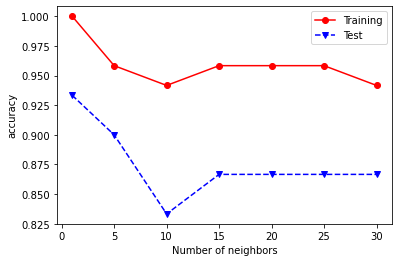

In [127]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
def plot_KNN_n_neighbors(numNeighbors,X_train,X_test,y_train,y_test):
    trainMSE = []
    testMSE = []

    for k in numNeighbors:
        reg = KNeighborsClassifier(
            algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
   metric_params = None, n_jobs = None, n_neighbors = k, p = 2,
   weights = 'uniform'
        )
        reg.fit(X_train, y_train)
        y_predTrain = reg.predict(X_train)
        y_predTest = reg.predict(X_test)
        trainMSE.append(accuracy_score(y_train, y_predTrain))
        testMSE.append(accuracy_score(y_test, y_predTest))

    plt.plot(numNeighbors, trainMSE, 'ro-', numNeighbors, testMSE,'bv--')
    plt.legend(['Training','Test'])
    plt.xlabel('Number of neighbors')
    plt.ylabel('accuracy')

plot_KNN_n_neighbors(numNeighbors,X_train_scale,X_test_scale,y_train,y_test)

**Nhận xét**

-  Thấy với k=1 accuracy= 100% (overfitting ) khoảng cách giữa train và test lớn

-  Với K từ 10 đến 30, cả accuracy giữa tập train và tập test điều thấy (underfitting)

- Vậy nên: K=5 ở trường hợp này là tối ưu nhất

## Bài tập 4. Chẩn đoán bias-variance dùng

### 4.1. Vẽ learning curves
Sử dụng tập train và test của tập dữ liệu `iris` ở bước 2.3 của bài tập 2, hãy vẽ learning curves cho mô hình k-NN (k = 5).

Tham khảo: https://scikit-learn.org/stable/modules/learning_curve.html

In [128]:
def plot_learning_curves(model,  X, y,k=5):
#    from sklearn.metrics import mean_squared_error
   from sklearn.metrics import accuracy_score
   from sklearn.model_selection import train_test_split
   plt.figure(figsize=(17,8))
   X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
   train_errors, val_errors = [], []
   for m in range(k, len(X_train)):
      model.fit(X_train[:m], y_train[:m])
      y_train_predict = model.predict(X_train[:m])
      y_val_predict = model.predict(X_val)
      train_errors.append(accuracy_score(y_train_predict, y_train[:m]))
      val_errors.append(accuracy_score(y_val_predict, y_val))
   plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
   plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")
   plt.xlabel("data size")
   plt.ylabel("Accuracy")
   plt.legend()

In [129]:
X_sc=sc.fit_transform(X);

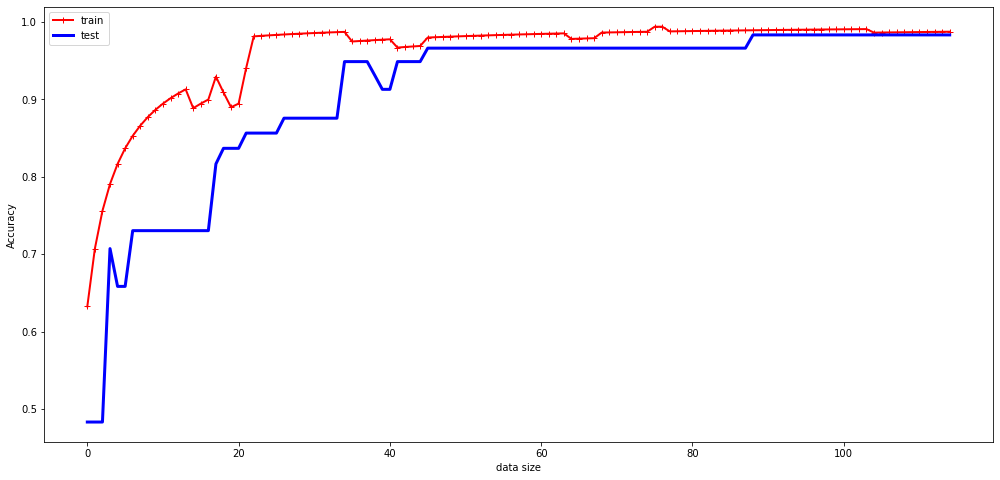

In [133]:

# WRITE YOUR CODE HERE
k=5

classifier=KNeighborsClassifier(n_neighbors=k, p=2)
classifier.fit(X_sc,y)
plot_learning_curves(classifier,X_sc,y,k)


### 4.2. Chuẩn đoán bias-variance dùng learning curves

Dựa vào learning curves vẽ được ở câu 3.1, hãy chuẩn đoán xem mô hình có đang bị bias hay variance hay cả hai? Giải thích?

**Trả lời**

Với learning curves trên: ta thấy mô hình KNN với k=5 là low variance và low bias. Vì tại vị trí cuối của learning cuvers accuracy của train và test gần như là bằng nhau